### EDA CSV SalesFINAL12312016

In [1]:
# Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Cargar el dataset
df_SalesFinal = pd.read_csv("Dataset/SalesFINAL12312016.csv")
df_SalesFinal.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [3]:
# Obtener información general del dataset
df_SalesFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB


In [4]:
# Descripción estadística básica
df_SalesFinal.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.008063e+01,1.216959e+04,2.337619e+00,3.160420e+01,1.543162e+01,9.500280e+02,1.416550e+00,1.326847e+00,6.995043e+03
std,2.435739e+01,1.241921e+04,3.511492e+00,6.570249e+01,1.404967e+01,7.142708e+02,4.929872e-01,3.407898e+00,8.426736e+03
min,1.000000e+00,5.800000e+01,1.000000e+00,4.900000e-01,4.900000e-01,5.000000e+01,1.000000e+00,1.000000e-02,2.000000e+00
25%,1.500000e+01,3.680000e+03,1.000000e+00,1.099000e+01,8.990000e+00,7.500000e+02,1.000000e+00,1.600000e-01,3.252000e+03
50%,3.900000e+01,6.296000e+03,1.000000e+00,1.799000e+01,1.299000e+01,7.500000e+02,1.000000e+00,6.800000e-01,4.425000e+03
75%,6.400000e+01,1.795400e+04,2.000000e+00,3.199000e+01,1.899000e+01,1.500000e+03,2.000000e+00,1.570000e+00,9.552000e+03
max,7.900000e+01,9.008900e+04,4.320000e+02,1.327997e+04,4.999990e+03,2.000000e+04,2.000000e+00,3.785200e+02,1.733570e+05


In [5]:
# Verificación de valores nulos
df_SalesFinal.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [6]:
# Verificar si hay filas duplicadas
duplicated_rows = df_SalesFinal.duplicated()

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

# Mostrar el número de filas duplicadas
print(f'Número de filas duplicadas: {num_duplicated_rows}')

# Opcional: Mostrar las filas duplicadas
if num_duplicated_rows > 0:
    print(df_SalesFinal[duplicated_rows])

Número de filas duplicadas: 0


In [7]:
#Se verifica el tipo de dato de cada columna
print(df_SalesFinal.dtypes)

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
SalesQuantity       int64
SalesDollars      float64
SalesPrice        float64
SalesDate          object
Volume              int64
Classification      int64
ExciseTax         float64
VendorNo            int64
VendorName         object
dtype: object


In [8]:
# Convertir la columna 'SalesDate' a formato de fecha (si no está en ese formato)
df_SalesFinal['SalesDate'] = pd.to_datetime(df_SalesFinal['SalesDate'], errors='coerce')

# Verificar la fecha mínima y máxima
fecha_minima = df_SalesFinal['SalesDate'].min()
fecha_maxima = df_SalesFinal['SalesDate'].max()

# Mostrar las fechas
print(f"Fecha mínima: {fecha_minima}")
print(f"Fecha máxima: {fecha_maxima}")

Fecha mínima: 2016-01-01 00:00:00
Fecha máxima: 2016-02-29 00:00:00


#### La fecha máxima registrada en el dataset de ventas es 2016-02-29, es decir, solamante existen 2 meses registrados de ventas del 2016, Enero y Febrero.

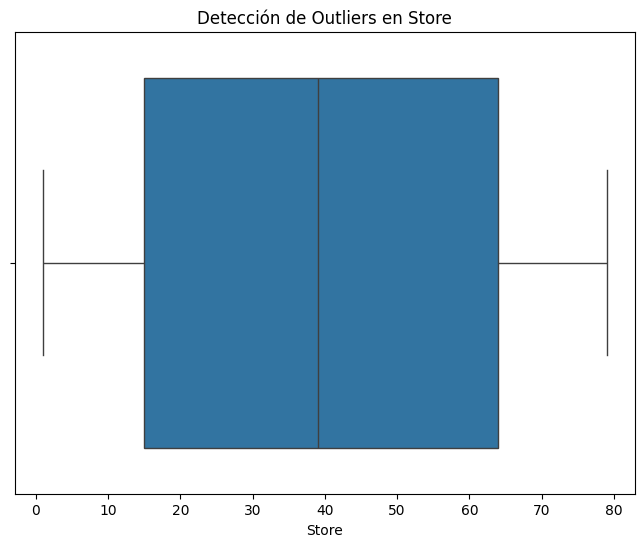

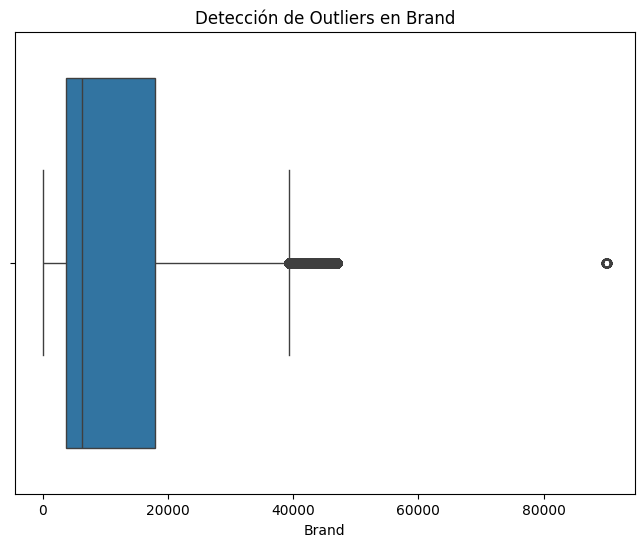

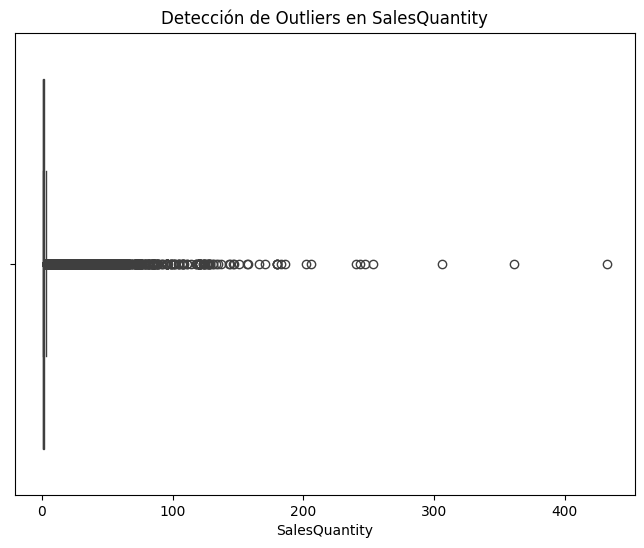

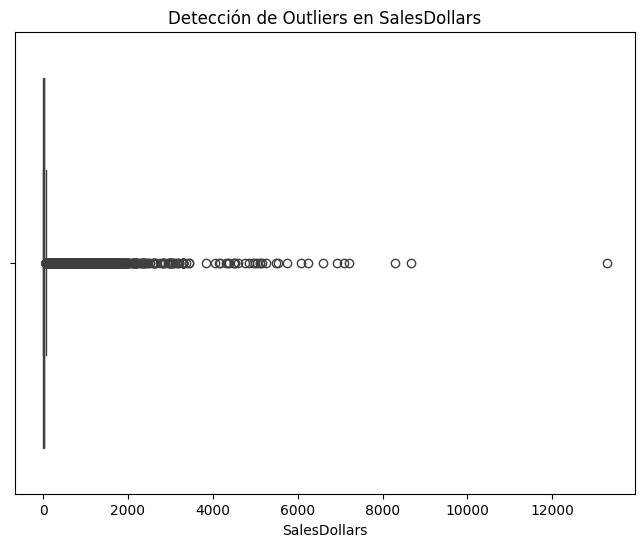

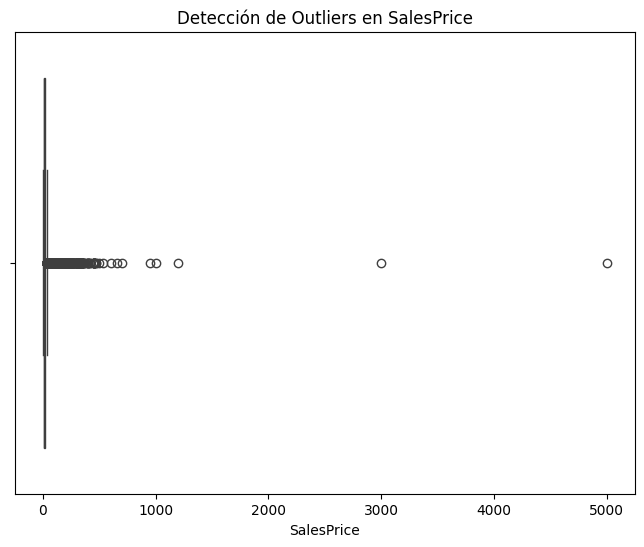

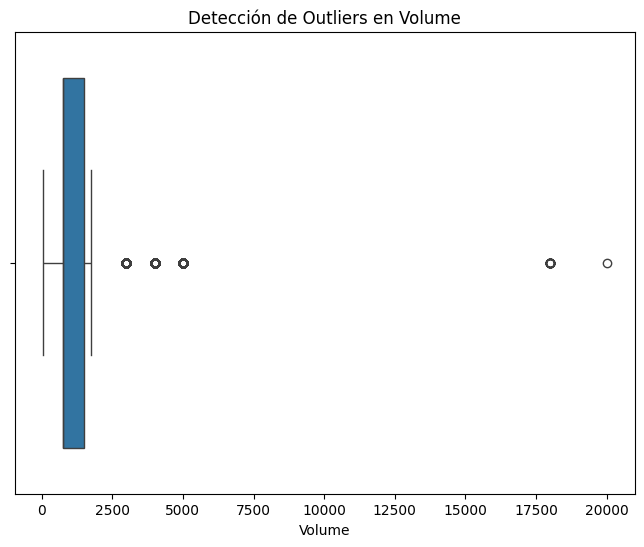

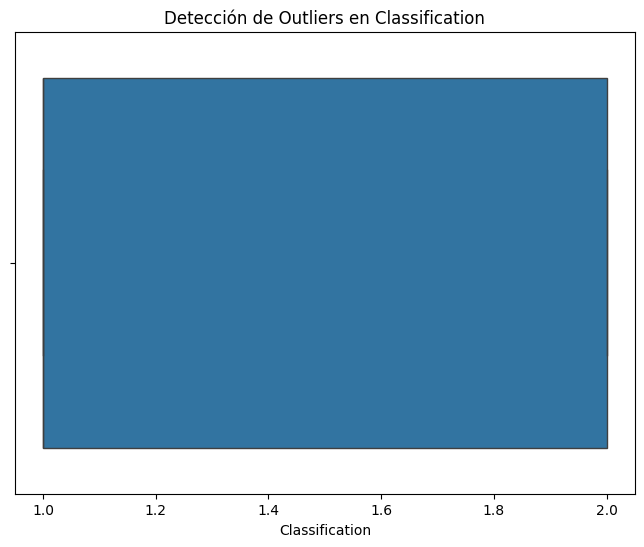

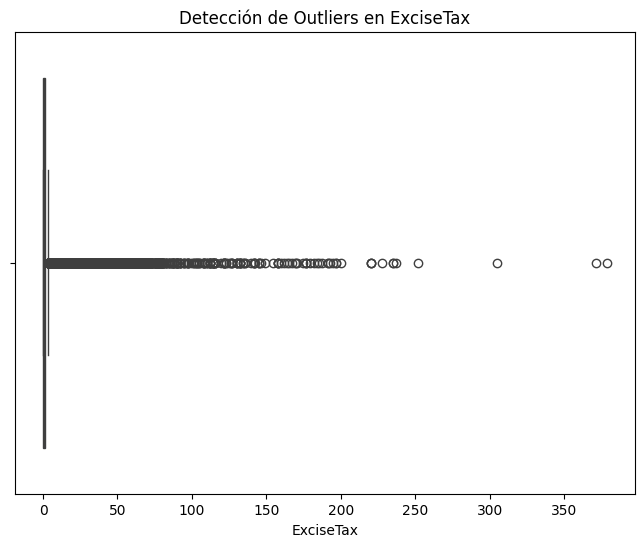

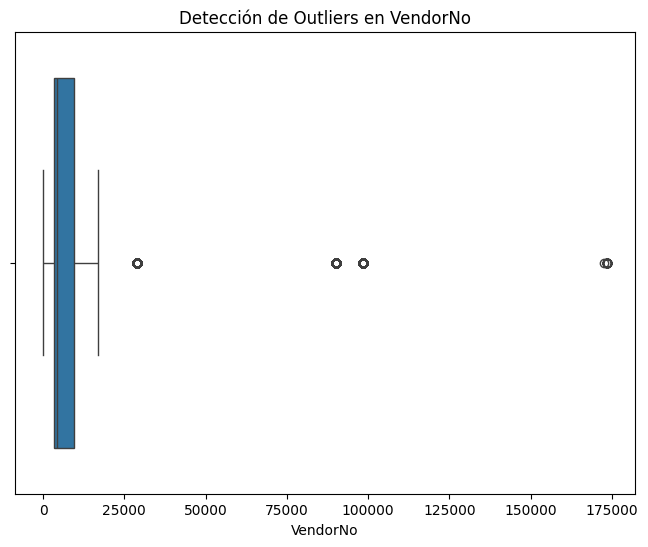

In [9]:
# Detección de outliers columnas (ajusta el nombre de la columna según el dataset)
# Filtrar las columnas numéricas del DataFrame
columnas_numericas = df_SalesFinal.select_dtypes(include=['float64', 'int64']).columns

# Iterar sobre las columnas numéricas
for columna in columnas_numericas:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_SalesFinal[columna])
    plt.title(f'Detección de Outliers en {columna}')
    plt.show()

In [10]:
# Función para detectar y mostrar outliers de una columna
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[columna].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango Intercuartílico

    # Definir los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar las filas que están fuera de los límites (outliers)
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    return outliers

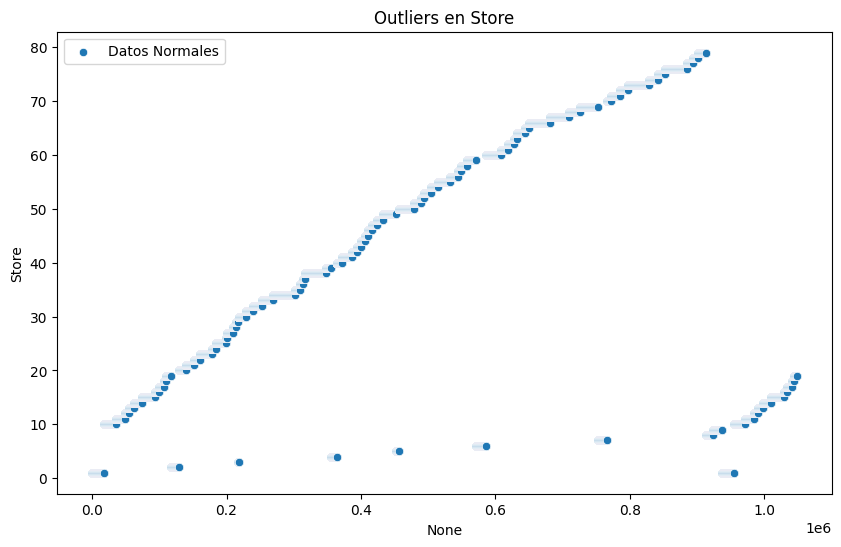

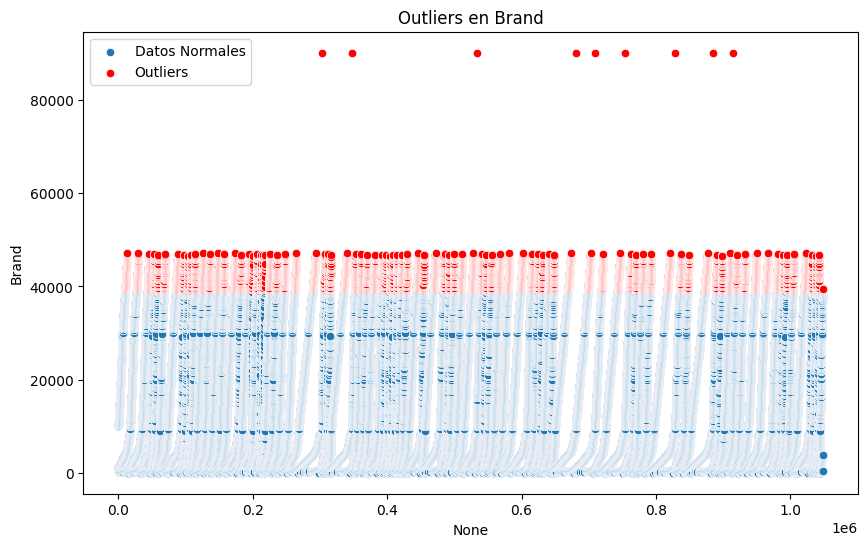

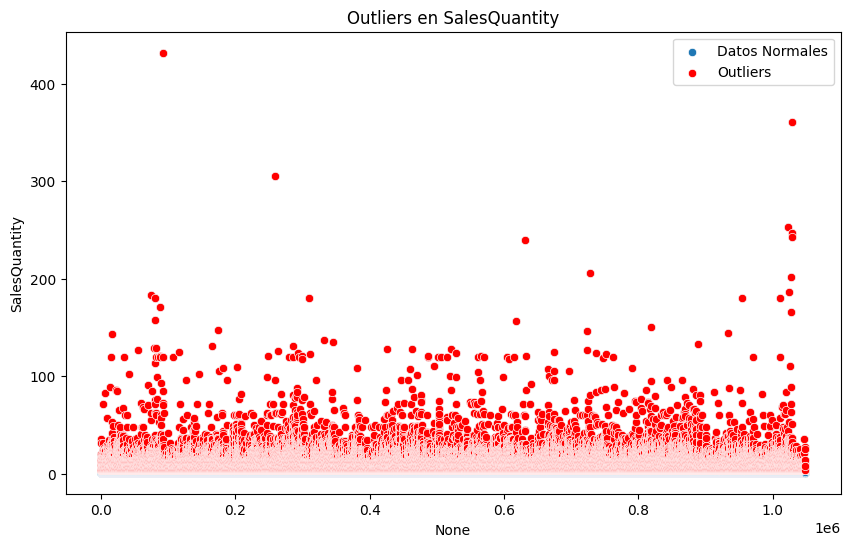

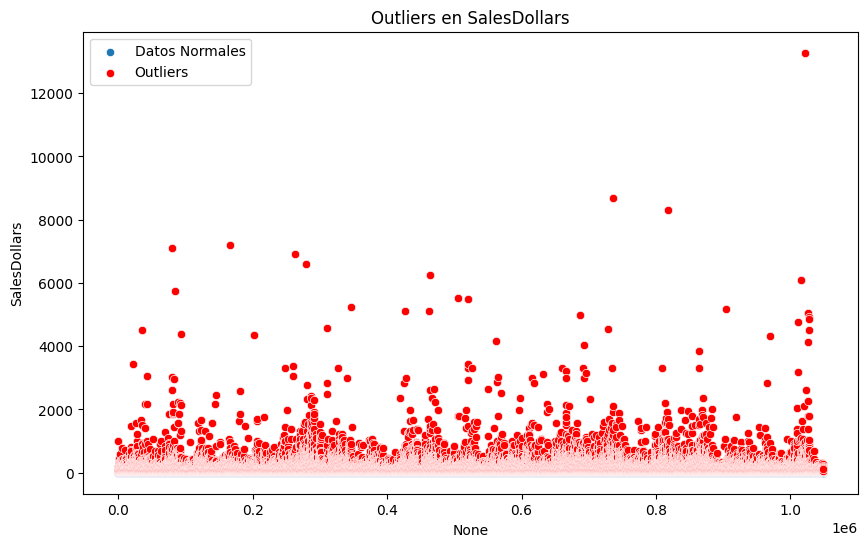

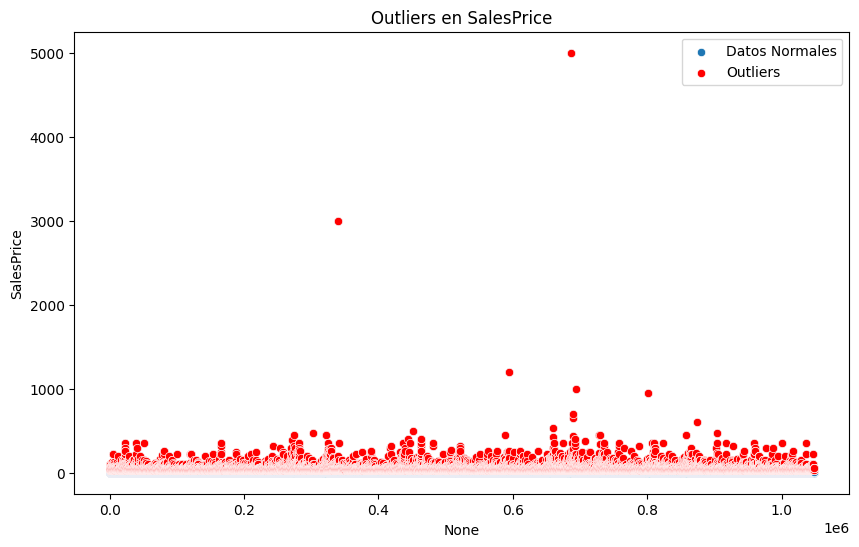

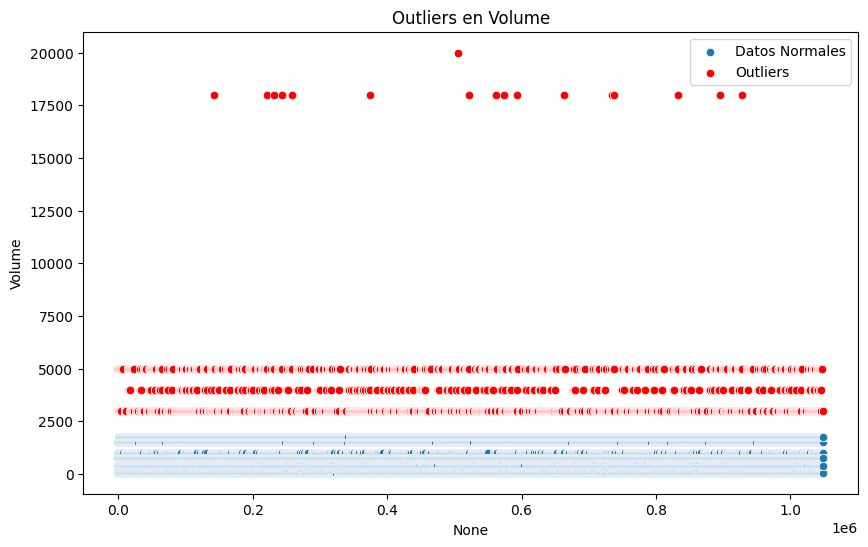

C:\Users\danip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


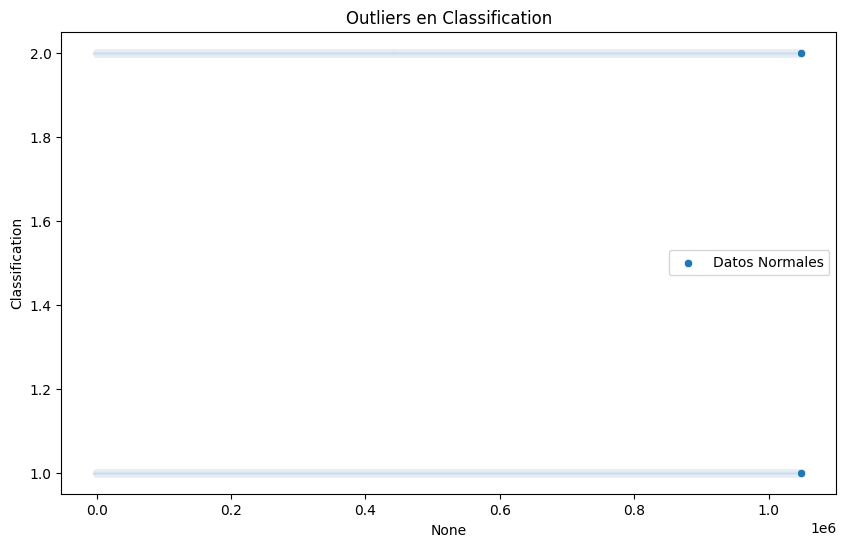

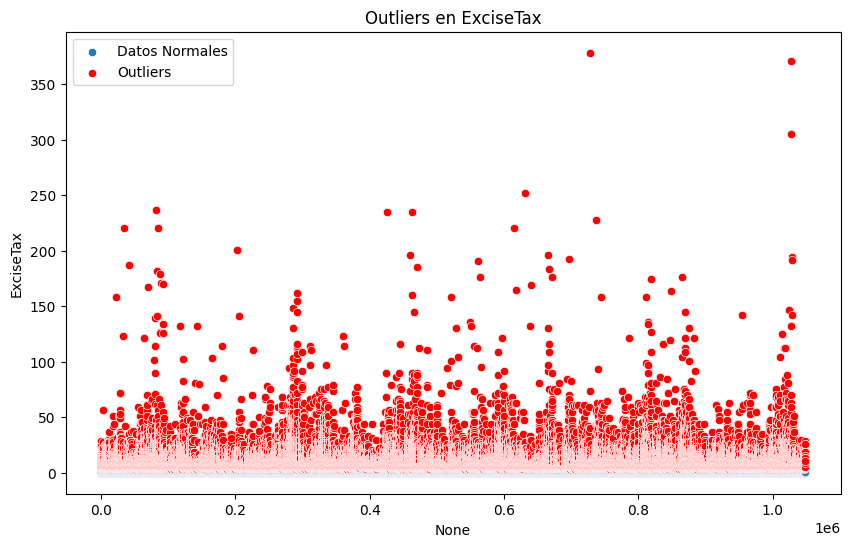

C:\Users\danip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


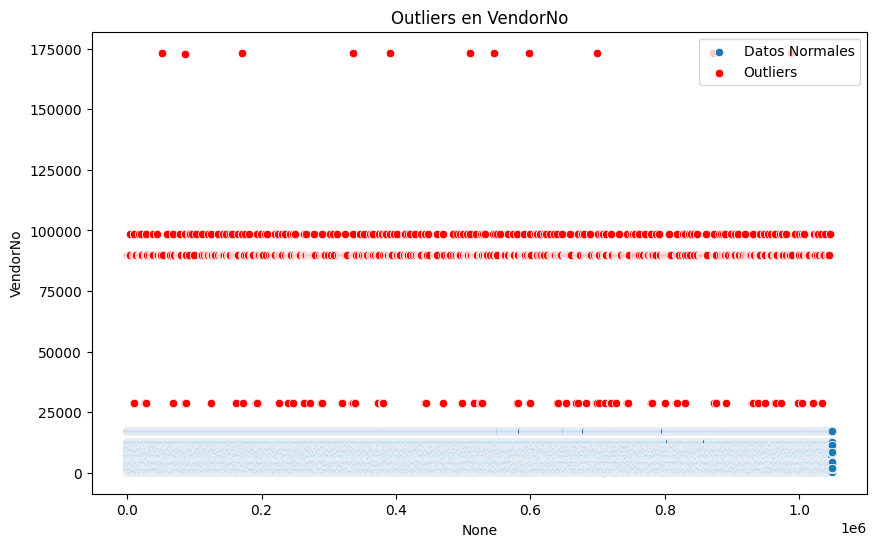

In [11]:
# Gráfico para mostrar outliers junto con datos normales
columnas_a_verificar = df_SalesFinal.select_dtypes(include=['float64', 'int64']).columns

for columna in columnas_a_verificar:
    plt.figure(figsize=(10,6))
    
    # Graficar los puntos de la columna
    sns.scatterplot(x=df_SalesFinal.index, y=df_SalesFinal[columna], label='Datos Normales')

    # Graficar los puntos de los outliers
    outliers = detectar_outliers(df_SalesFinal, columna)
    sns.scatterplot(x=outliers.index, y=outliers[columna], color='red', label='Outliers')
    
    plt.title(f'Outliers en {columna}')
    plt.legend()
    plt.show()

In [12]:
# Verificar si hay valores negativos en las columnas numéricas
negatives = df_SalesFinal.select_dtypes(include=['number']) < 0

# Obtener los nombres de las columnas que tienen valores negativos
negative_columns = negatives.any()

# Filtrar las columnas que tienen al menos un valor negativo
columns_with_negatives = negative_columns[negative_columns].index.tolist()

# Mostrar los resultados
if columns_with_negatives:
    print(f"Columnas con valores negativos: {columns_with_negatives}")
    for column in columns_with_negatives:
        print(f"\nValores negativos en la columna '{column}':")
        print(df_SalesFinal[df_SalesFinal[column] < 0])
else:
    print("No hay valores negativos en el DataFrame.")

No hay valores negativos en el DataFrame.


In [13]:
#Se analizan las distintas columnas 

for i in df_SalesFinal.columns:
    print(i)
    print(df_SalesFinal[i].describe()) #descripcion basica 
    print('--------------------------------------')

InventoryId
count                1048575
unique                170131
top       13_TARMSWORTH_8064
freq                      57
Name: InventoryId, dtype: object
--------------------------------------
Store
count    1.048575e+06
mean     4.008063e+01
std      2.435739e+01
min      1.000000e+00
25%      1.500000e+01
50%      3.900000e+01
75%      6.400000e+01
max      7.900000e+01
Name: Store, dtype: float64
--------------------------------------
Brand
count    1.048575e+06
mean     1.216959e+04
std      1.241921e+04
min      5.800000e+01
25%      3.680000e+03
50%      6.296000e+03
75%      1.795400e+04
max      9.008900e+04
Name: Brand, dtype: float64
--------------------------------------
Description
count               1048575
unique                 6890
top       Smirnoff 80 Proof
freq                   7123
Name: Description, dtype: object
--------------------------------------
Size
count     1048575
unique         40
top         750mL
freq       593098
Name: Size, dtype: object
---

In [14]:
# Listar los nombres de las columnas del DataFrame
columnas = df_SalesFinal.columns
print(columnas)


Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')


#### Relación entre SalesQuantity, SalesDollars y SalesPrice

In [15]:
# Calcular ingresos totales y precio promedio
df_SalesFinal['Total_Sales'] = df_SalesFinal['SalesQuantity'] * df_SalesFinal['SalesPrice']

# Resumen de ventas por producto
ventas_por_producto = df_SalesFinal.groupby('Description')[['SalesQuantity', 'Total_Sales']].sum().reset_index()
print(ventas_por_producto)


                     Description  SalesQuantity  Total_Sales
0                         (RI) 1             40      1470.60
1            10 Span Cab Svgn CC             24       179.76
2               10 Span Chard CC             84       629.16
3              10 Span Pnt Nr CC             31       232.19
4     12 Days of Pearls Gift Set             26       259.74
...                          ...            ...          ...
6885        Zorvino Vyds Peachez             69       689.31
6886          Zorvino Vyds Pearz            110      1098.90
6887     Zorvino Vyds Sangiovese             33       412.17
6888                     Zum Rsl             98       981.02
6889           von Buhl Jazz Rsl              9       143.91

[6890 rows x 3 columns]


#### Relación entre Store y SalesQuantity/SalesDollars

In [16]:
# Resumen de ventas por tienda
ventas_por_tienda = df_SalesFinal.groupby('Store')[['SalesQuantity', 'SalesDollars']].sum().reset_index()
print(ventas_por_tienda)


    Store  SalesQuantity  SalesDollars
0       1          82750     975115.86
1       2          26740     402401.61
2       3           2245      30556.67
3       4          20325     230082.72
4       5           8643      93172.39
..    ...            ...           ...
74     75          22142     289368.88
75     76          85724    1402698.59
76     77          19269     232314.08
77     78          17142     193179.93
78     79          25103     355114.46

[79 rows x 3 columns]


#### Relación entre Brand, SalesQuantity y SalesDollars

In [17]:
# Resumen de ventas por marca
ventas_por_marca = df_SalesFinal.groupby('Brand')[['SalesQuantity', 'SalesDollars']].sum().reset_index()
print(ventas_por_marca)


      Brand  SalesQuantity  SalesDollars
0        58            288       3741.12
1        60            124       1358.76
2        61             24        335.76
3        62            162       6552.38
4        63            131       5552.69
...     ...            ...           ...
7653  90084              2         63.98
7654  90085              2         73.98
7655  90086              1         51.99
7656  90087              1        469.99
7657  90089             27       3239.73

[7658 rows x 3 columns]


#### Relación entre SalesDate y SalesQuantity/SalesDollars

In [18]:
# Resumen de ventas por fecha
ventas_por_fecha = df_SalesFinal.groupby('SalesDate')[['SalesQuantity', 'SalesDollars']].sum().reset_index()
print(ventas_por_fecha)


    SalesDate  SalesQuantity  SalesDollars
0  2016-01-01          49911     687880.01
1  2016-01-02          93114    1303610.64
2  2016-01-03          53037     709085.36
3  2016-01-04          41341     499567.87
4  2016-01-05          40831     496719.05
5  2016-01-06          51358     660150.82
6  2016-01-07          59792     776881.62
7  2016-01-08          97389    1336517.75
8  2016-01-09         101690    1428520.90
9  2016-01-10          46146     611492.80
10 2016-01-11          44654     552554.14
11 2016-01-12          49803     623496.79
12 2016-01-13          48556     628019.10
13 2016-01-14          64830     870579.08
14 2016-01-15         107858    1495923.18
15 2016-01-16          98860    1437986.56
16 2016-01-17          66170     922572.72
17 2016-01-18          48512     636162.08
18 2016-01-19          49128     644563.58
19 2016-01-20          53132     706044.78
20 2016-01-21          70333     937047.99
21 2016-01-22         107974    1494801.82
22 2016-01-

#### Relación entre Size y SalesQuantity

In [19]:
# Resumen de ventas por tamaño
ventas_por_tamano = df_SalesFinal.groupby('Size')['SalesQuantity'].sum().reset_index()
print(ventas_por_tamano)


          Size  SalesQuantity
0         1.5L         146485
1        1.75L         433307
2        100mL           5854
3   100mL 4 Pk           2055
4        180mL             95
5        187mL           4819
6   187mL 3 Pk            522
7   187mL 4 Pk           5737
8          18L             43
9        200mL           5469
10  200mL 3 Pk            103
11  200mL 4 Pk            454
12         20L             24
13     22.0 Oz              3
14       250mL            241
15  250mL 4 Pk            274
16     3/100mL            551
17       300mL            787
18       330mL            203
19       375mL          90576
20  375mL 2 Pk            280
21  375mL 3 Pk             23
22          3L          16023
23          4L           2001
24      5.0 Oz            303
25       500mL           4719
26        50mL         455191
27  50mL 12 Pk             26
28   50mL 3 Pk            736
29   50mL 4 Pk           1811
30   50mL 5 Pk           2566
31          5L          19861
32       7

#### Relación entre VendorNo, VendorName y SalesDollars

In [20]:
# Resumen de ventas por proveedor
ventas_por_proveedor = df_SalesFinal.groupby(['VendorNo', 'VendorName'])['SalesDollars'].sum().reset_index()
print(ventas_por_proveedor)


     VendorNo                               VendorName  SalesDollars
0           2  IRA GOLDMAN AND WILLIAMS, LLP                   73.98
1         105              ALTAMAR BRANDS LLC                 791.79
2         287              APPOLO VINEYARDS LLC               123.92
3         388              ATLANTIC IMPORTING COMPANY        6344.11
4         480              BACARDI USA INC                1663604.55
..        ...                                      ...           ...
112     90057              WALPOLE MTN VIEW WINERY            772.05
113     90058              ZORVINO VINEYARDS                 6971.89
114     98450              Serralles Usa LLC                15320.97
115    172662                 SWEETWATER FARM                 155.94
116    173357              TAMWORTH DISTILLING               1074.57

[117 rows x 3 columns]


#### Relación entre Classification y SalesDollars

In [21]:
# Resumen de ventas por clasificación
ventas_por_clasificacion = df_SalesFinal.groupby('Classification')['SalesDollars'].sum().reset_index()
print(ventas_por_clasificacion)


   Classification  SalesDollars
0               1   20550829.07
1               2   12588546.22


#### Análisis de Impuestos: ExciseTax

In [22]:
# Resumen del impuesto por ventas
impuestos_por_producto = df_SalesFinal.groupby('Description')['ExciseTax'].sum().reset_index()
print(impuestos_por_producto)


                     Description  ExciseTax
0                         (RI) 1      31.57
1            10 Span Cab Svgn CC       2.70
2               10 Span Chard CC       9.45
3              10 Span Pnt Nr CC       3.47
4     12 Days of Pearls Gift Set       1.31
...                          ...        ...
6885        Zorvino Vyds Peachez       7.60
6886          Zorvino Vyds Pearz      12.12
6887     Zorvino Vyds Sangiovese       3.65
6888                     Zum Rsl      10.88
6889           von Buhl Jazz Rsl       1.00

[6890 rows x 2 columns]


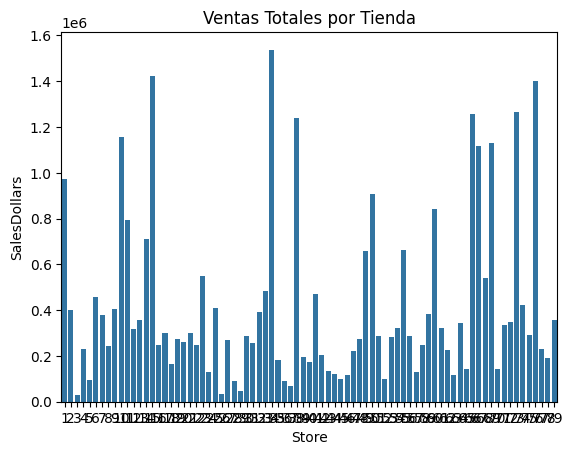

In [23]:
# Visualizar ventas por tienda
sns.barplot(x='Store', y='SalesDollars', data=ventas_por_tienda)
plt.title('Ventas Totales por Tienda')
plt.show()

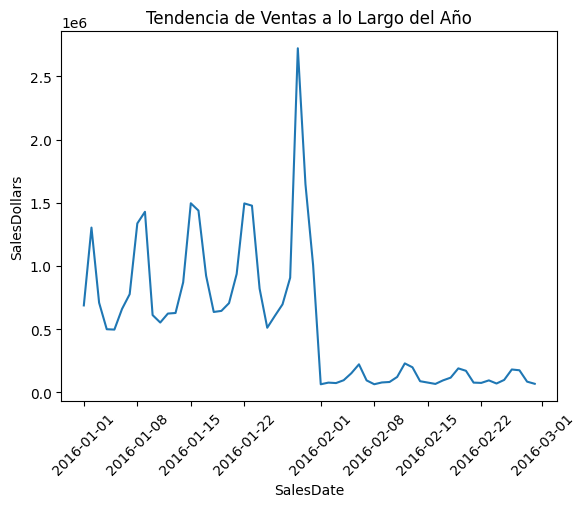

In [24]:
#Gráfico de Tendencia para Ventas por Fecha

sns.lineplot(x='SalesDate', y='SalesDollars', data=ventas_por_fecha)
plt.title('Tendencia de Ventas a lo Largo del Año')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Se analizan las columnas con tipo de datos flotantes
# Lista de columnas de tipo flotante

numeric_columns_of_interest = df_SalesFinal.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Función para imprimir las estadísticas de una columna
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores (incluyendo nulos): {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valor más frecuente (top): {df[column].mode()[0]}")
    print(f"Frecuencia del valor más frecuente (freq): {df[column].value_counts().iloc[0]}")
    print(f"Valor mínimo: {column_stats['min']}")
    print(f"Valor máximo: {column_stats['max']}")
    print(f"Media: {column_stats['mean']}")

# Iterar sobre las columnas de interés y mostrar las estadísticas
for column in numeric_columns_of_interest:
    print_column_stats(df_SalesFinal, column)


Estadísticas para la columna 'Store':
Número total de valores (incluyendo nulos): 1048575
Número total de valores: 1048575.0
Número de valores únicos: 79
Valor más frecuente (top): 15
Frecuencia del valor más frecuente (freq): 38637
Valor mínimo: 1.0
Valor máximo: 79.0
Media: 40.08063228667477

Estadísticas para la columna 'Brand':
Número total de valores (incluyendo nulos): 1048575
Número total de valores: 1048575.0
Número de valores únicos: 7658
Valor más frecuente (top): 3606
Frecuencia del valor más frecuente (freq): 2077
Valor mínimo: 58.0
Valor máximo: 90089.0
Media: 12169.585280976564

Estadísticas para la columna 'SalesQuantity':
Número total de valores (incluyendo nulos): 1048575
Número total de valores: 1048575.0
Número de valores únicos: 141
Valor más frecuente (top): 1
Frecuencia del valor más frecuente (freq): 602910
Valor mínimo: 1.0
Valor máximo: 432.0
Media: 2.337619149798536

Estadísticas para la columna 'SalesDollars':
Número total de valores (incluyendo nulos): 1048

##### 1. Columna 'Store' (ID de la Tienda): Hay 79 tiendas en total, lo que muestra una red de distribución amplia. La Tienda 15 tiene una gran cantidad de ventas, lo que indica que es una tienda clave para AMC-Drinks. Esto sugiere la posibilidad de concentrar esfuerzos de marketing o reposición en las tiendas con mayor actividad.

##### 2. Columna 'Brand' (ID de Marca): 7,658 marcas únicas indica una diversidad considerable de productos, lo cual es beneficioso para atraer a diferentes segmentos de clientes. Sin embargo, la baja frecuencia de las marcas más comunes sugiere que solo algunas marcas dominan las ventas, mientras que muchas otras tienen poca rotación. Esto es útil para optimizar el inventario y concentrarse en las marcas más rentables.

##### 3. Columna 'SalesQuantity' (Cantidad Vendida): La cantidad más común vendida es 1 unidad, lo que sugiere que la mayoría de las transacciones involucran pequeñas cantidades, probablemente compras individuales o minoristas. Solo una pequeña fracción de las ventas involucra grandes volúmenes (máximo de 432), lo que indica que las ventas al por mayor son menos comunes.

##### 4. Columna 'SalesDollars' (Ingresos por Venta): El precio de venta más común es 9.99 USD, lo que indica que muchos productos están en un rango de precios asequibles. El precio máximo de 13,279.97 USD sugiere que también hay productos premium de alto valor, aunque son menos frecuentes. La media de 31.60 USD sugiere que la mayoría de los productos están en un rango de precios moderado.

##### 5. Columna 'SalesPrice' (Precio por Unidad): La mayoría de los productos tienen un precio de 9.99 USD, lo que confirma que muchos productos están en un rango de precios accesible. Sin embargo, la presencia de un precio máximo de 4,999.99 USD sugiere una mezcla de productos de lujo en la oferta.

##### 6. Columna 'Volume' (Volumen del Producto): El tamaño de 750 ml es el más común, lo que corresponde típicamente a botellas de vino o licores estándar. El volumen máximo de 20,000 ml indica que también se manejan productos a granel o en grandes contenedores, probablemente destinados a ventas al por mayor o grandes eventos.

##### 7. Columna 'Classification' (Clasificación del Producto): La mayoría de los productos están en la clasificación 1, lo que sugiere que la clasificación 2 corresponde a productos especiales o premium. Este tipo de información puede ser útil para segmentar los productos en términos de marketing o estrategias de precios.

##### 8. Columna 'ExciseTax' (Impuesto por Venta): La mayoría de los productos tienen un impuesto relativamente bajo (0.79 USD), lo que sugiere que los impuestos por unidad no son elevados. Sin embargo, el impuesto máximo es de 378.52 USD, lo que sugiere que hay algunos productos que están sujetos a altos impuestos, posiblemente productos de lujo o grandes volúmenes.

##### 9. Columna 'VendorNo' (Número de Proveedor):Hay 116 proveedores únicos, lo que indica que AMC-Drinks tiene una variedad moderada de proveedores, pero parece depender más de algunos proveedores clave. El proveedor 3960 representa la mayor cantidad de ventas, lo que sugiere que es un socio clave en la cadena de suministro.

##### 10. Columna 'Total_Sales' (Ventas Totales por Transacción): El total de ventas por transacción tiene una media de 31.60 USD, lo que sugiere que la mayoría de las ventas están en rangos accesibles. Sin embargo, las ventas de mayor valor (hasta 13,279.97 USD) sugieren que hay algunos clientes que realizan compras de alto valor, probablemente debido a compras de productos caros o grandes volúmenes.

In [26]:
# Se observan si  hay celdas con Total_Sales = 0
# Contar el número de celdas con precio igual a 0 en la columna 'Total_Sales'
zero_Total_Sales_count = (df_SalesFinal['Total_Sales'] == 0).sum()

# Mostrar el resultado
print(f"Número de celdas con Total_Sales igual a 0 en 'Total_Sales': {zero_Total_Sales_count}")

Número de celdas con Total_Sales igual a 0 en 'Total_Sales': 0


In [27]:
# Crear la columna 'ID_Venta' autoincremental
df_SalesFinal['SalesID'] = range(1, len(df_SalesFinal) + 1)

# Verificar los primeros registros para confirmar
print(df_SalesFinal.head())


           InventoryId  Store  Brand                 Description        Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice  SalesDate  Volume  Classification  \
0              1         16.49       16.49 2016-01-01     750               1   
1              2         32.98       16.49 2016-01-02     750               1   
2              1         16.49       16.49 2016-01-03     750               1   
3              1         14.49       14.49 2016-01-08     750               1   
4              2         69.98       34.99 2016-01-09     375               1   

   ExciseTax  VendorNo          

In [28]:
# Diccionario que mapea los nombres actuales de las columnas a los nuevos nombres
column_renames = {
    'InventoryId': 'InventoryId',
    'Store': 'StoreID',
    'Brand': 'BrandID',
    'Description': 'Description',
    'Size': 'ContainerType',
    'SalesQuantity': 'SalesQuantity',
    'SalesDollars': 'SalesDollars',
    'SalesPrice': 'SalesPrice',
    'SalesDate': 'SalesDate',
    'Volume': 'Volume',
    'Classification': 'Classification',
    'ExciseTax': 'ExciseTax',
    'VendorNo': 'VendorID',
    'VendorName': 'VendorName',
    'TotalSales': 'TotalSales',
    'SalesID': 'SalesID'
}

# Renombrar las columnas
df_SalesFinal.rename(columns=column_renames, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_SalesFinal.head())

           InventoryId  StoreID  BrandID                 Description  \
0  1_HARDERSFIELD_1004        1     1004  Jim Beam w/2 Rocks Glasses   
1  1_HARDERSFIELD_1004        1     1004  Jim Beam w/2 Rocks Glasses   
2  1_HARDERSFIELD_1004        1     1004  Jim Beam w/2 Rocks Glasses   
3  1_HARDERSFIELD_1004        1     1004  Jim Beam w/2 Rocks Glasses   
4  1_HARDERSFIELD_1005        1     1005     Maker's Mark Combo Pack   

  ContainerType  SalesQuantity  SalesDollars  SalesPrice  SalesDate  Volume  \
0         750mL              1         16.49       16.49 2016-01-01     750   
1         750mL              2         32.98       16.49 2016-01-02     750   
2         750mL              1         16.49       16.49 2016-01-03     750   
3         750mL              1         14.49       14.49 2016-01-08     750   
4    375mL 2 Pk              2         69.98       34.99 2016-01-09     375   

   Classification  ExciseTax  VendorID                   VendorName  \
0               1    

In [31]:
columnas = df_SalesFinal.columns
print(columnas)

Index(['InventoryId', 'StoreID', 'BrandID', 'Description', 'ContainerType',
       'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume',
       'Classification', 'ExciseTax', 'VendorID', 'VendorName', 'Total_Sales',
       'SalesID'],
      dtype='object')


In [32]:
#crear el nuevo archivo con las tablas finales
# Seleccionar las columnas deseadas
df_SalesFinal_Final = df_SalesFinal[['SalesID', 'InventoryId', 'StoreID', 'BrandID', 'Description', 'ContainerType', 
                                     'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 
                                     'Classification', 'ExciseTax', 'VendorID', 'VendorName', 'Total_Sales']]

In [33]:
# Guardar el resultado en un archivo CSV para revisarlo
df_SalesFinal_Final.to_csv('C:/Users/danip/Desktop/AMC-Drinks/Analisis_Inventario_Distribuidora_Licores_AMCDrinks/EDA/Dataset/VENTAS_FINAL.csv', index=False)

In [34]:
df_SalesFinal_Final.head()

,SalesID,InventoryId,StoreID,BrandID,Description,ContainerType,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorID,VendorName,Total_Sales
0,1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,16.49
1,2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,32.98
2,3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,16.49
3,4,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,14.49
4,5,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,69.98
